<a href="https://colab.research.google.com/github/Sinethemba-nongqoto/Research-project/blob/master/Analysis_0f_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries
---
1. **Data Manipulation**
- Pandas, numpy
2. **Data Visualization**
- Matplotlib, seaborn

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [4]:
features_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/Features%20data%20set.csv')
sales_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/sales%20data-set.csv')
stores_data = pd.read_csv('https://raw.githubusercontent.com/Sinethemba-nongqoto/Research-project/master/data/stores%20data-set.csv')

In [5]:
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
features_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Description analysis

In [9]:
print(sales_data.shape)
print(features_data.shape)
print(stores_data.shape)

(421570, 5)
(8190, 12)
(45, 3)


# Preprocessing
---
Exploring the descriptive statistics of the variables

In [10]:
sales_data.describe(include= 'all')

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,23/12/2011,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [11]:
features_data.describe(include ='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,26/10/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [12]:
stores_data.describe(include = 'all')

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


# Merge the data in a unique DataFrame
---

In [13]:
sales_df = pd.merge(sales_data,features_data, on=['Store', 'Date', 'IsHoliday'], how='left')

sales_df = pd.merge(sales_df, stores_data, on = ['Store'], how='left')

#for missing values we put 0 to all NaN

sales_df = sales_df.fillna(0)
# converting temperature to degrees celcius 
sales_df['Temperature'] = (sales_df['Temperature']- 32) * 5./9.

types_encoded, types = sales_df['Type'].factorize()
sales_df['Type'] = types_encoded

sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,5.727778,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315
1,1,1,12/02/2010,46039.49,True,3.616667,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315
2,1,1,19/02/2010,41595.55,False,4.405556,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315
3,1,1,26/02/2010,19403.54,False,8.127778,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315
4,1,1,05/03/2010,21827.90,False,8.055556,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315


# Check data and features

In [14]:
print('training_data duplicated:{}'.format(sales_df.duplicated().sum()))
sales_df.drop_duplicates(inplace =True)

training_data duplicated:0


In [15]:
tab_info = pd.DataFrame(sales_df.dtypes).T.rename(index={0:'column Type'})
tab_info = tab_info.append(pd.DataFrame(sales_df.isnull().sum()).T.rename(index={0:'null values(nb)'}))
tab_info = tab_info.append(pd.DataFrame(sales_df.isnull().sum()/sales_df.shape[0]*100).T.rename(index={0: 'null values(%)'}))

tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
null values(nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values(%),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Gain some graphichal insight
---

Plot some of the variables present in the data frame such as temperature, fuel price, CPI, unemployment rate, ...

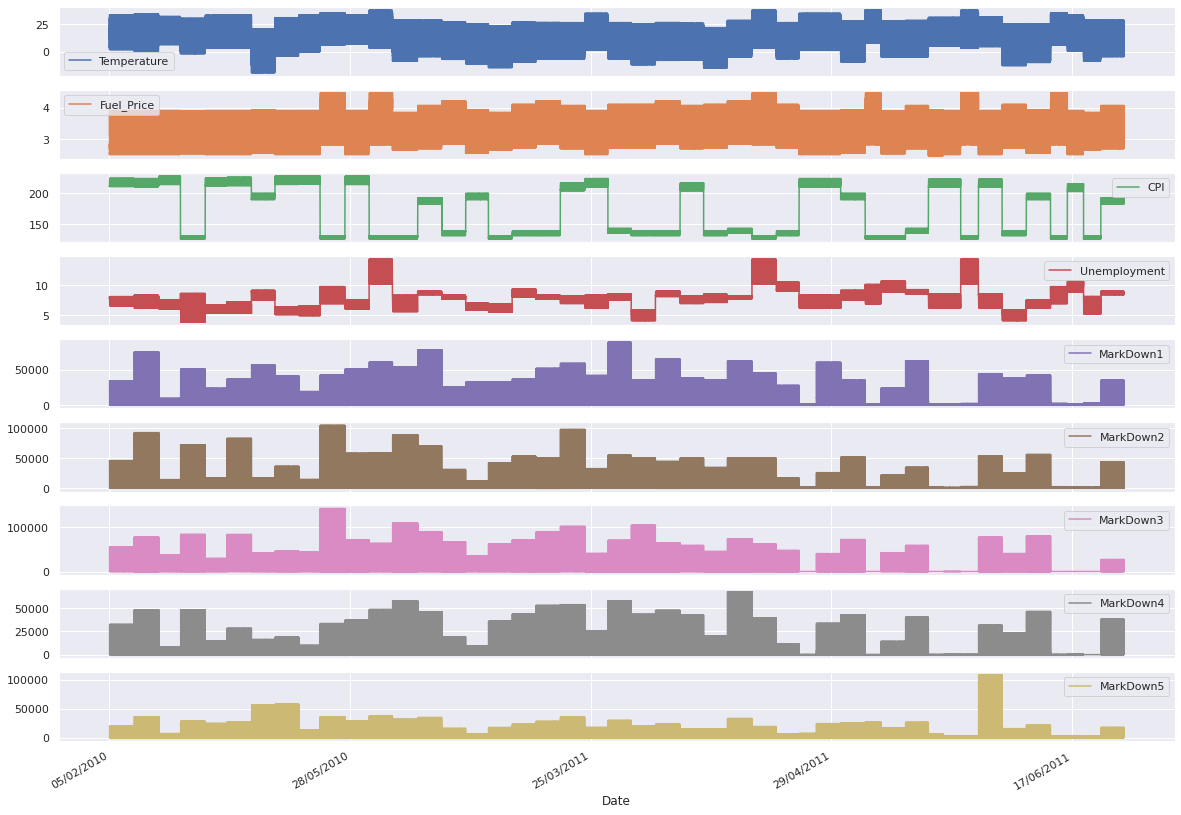

In [16]:
sales_df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize= (20, 15))
plt.show()

We sum the weekly sales from every shop to get the total weekly sales volume of the retail chain 

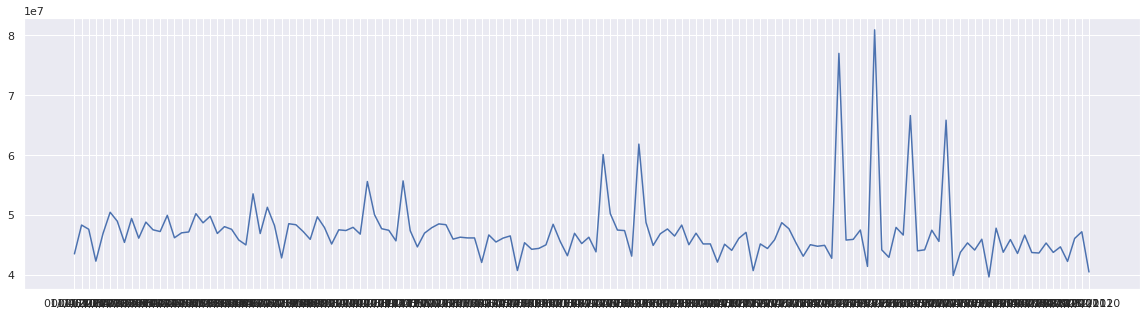

In [17]:
sales_df_average_sales_week = sales_df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
sales_df_average_sales =sales_df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(sales_df_average_sales_week.Date, sales_df_average_sales_week.Weekly_Sales)
plt.show()

# Get more insights

In [18]:
# The more remunerative weeks
sales_df_average_sales.head() 

,Date,Weekly_Sales
112,24/12/2010,80931415.60
107,23/12/2011,76998241.31
117,25/11/2011,66593605.26
122,26/11/2010,65821003.24
79,17/12/2010,61820799.85


In [19]:
st = sales_df_average_sales_week.set_index('Date')
#st = st.resample('H').ffill()
#st = st.resample('W').sum()

In [20]:
# The least remunerative weeks
sales_df_average_sales[::-1].head()

,Date,Weekly_Sales
128,28/01/2011,39599852.99
123,27/01/2012,39834974.67
142,31/12/2010,40432519.00
95,21/01/2011,40654648.03
62,14/01/2011,40673678.04


In [21]:

# Top performing type of stores in term of sales

sales_df_top_stores = sales_df.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
sales_df_top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,0,4.331015e+09
1,1,2.000701e+09
2,2,4.055035e+08


In [22]:
# Top performing stores in term of sales
sales_df_top_stores =sales_df.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
sales_df_top_stores.sort_values('Weekly_Sales', ascending=False)[:3]

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
